In [1]:
N = 17
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]


'Screen_Time_Before_Bed'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy import stats

In [4]:

data = pd.read_csv('teen_phone_addiction_dataset.csv')
print(data.head())


   ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  \
0                4.0          6.1                    78                    5   
1                5.5          6.5                    70                    5   
2                5.8          5.5                    93                    8   
3                3.1          3.9                    78                    8   
4                2.5          6.7                    56                    4   

   ...  Screen_Time_Before_Bed  Phone_Checks_Per_Day  Apps_Used_Daily  \
0  ...       

In [5]:
#Задание 1

screen_time = data['Screen_Time_Before_Bed']

# Среднее
mean_value = np.mean(screen_time)

# Дисперсия
variance_value = np.var(screen_time, ddof=1)

# Мода
mode_value = screen_time.mode()[0]

# Медиана
median_value = np.median(screen_time)

# Квантили
quantiles = screen_time.quantile([0.25, 0.5, 0.75])

# Эксцесс
kurtosis_value = kurtosis(screen_time, fisher=True)

# Ассиметрия
skewness_value = skew(screen_time)

# Интерквартильный размах
iqr = quantiles[0.75] - quantiles[0.25]

# Вывод результатов
print(f'Среднее: {mean_value}')
print(f'Дисперсия: {variance_value}')
print(f'Мода: {mode_value}')
print(f'Медиана: {median_value}')
print(f'Квантили: {quantiles}')
print(f'Эксцесс: {kurtosis_value}')
print(f'Ассиметрия: {skewness_value}')
print(f'Интерквартильный размах: {iqr}')



Среднее: 1.0067333333333335
Дисперсия: 0.24292897187951631
Мода: 1.0
Медиана: 1.0
Квантили: 0.25    0.7
0.50    1.0
0.75    1.4
Name: Screen_Time_Before_Bed, dtype: float64
Эксцесс: -0.35033868704647286
Ассиметрия: 0.09837930491958932
Интерквартильный размах: 0.7


- Среднее: 1.007
Это значение близко к 1, что указывает на то, что в среднем подростки проводят около 1 часа экранного времени перед сном.

- Дисперсия 0.243
Низкая дисперсия свидетельствует о том, что данные относительно сгруппированы вокруг среднего значения, с небольшим разбросом.

- Мода: 1.0
Мода равна 1.0, что означает, что наиболее часто встречающееся значение времени экранного времени перед сном составляет 1 час.

- Медиана: 1.0
Медиана также равна 1.0, что подтверждает, что половина подростков проводит 1 час или меньше перед сном. Это значение близко к среднему, что указывает на симметричное распределение.

- Квантили:
25-й процентиль (Q1): 0.7
50-й процентиль (Q2, медиана): 1.0
75-й процентиль (Q3): 1.4

- Интерквартильный размах (IQR = Q3 - Q1 = 1.4 - 0.7 = 0.7) показывает, что 50% данных находятся в диапазоне от 0.7 до 1.4.
- Эксцесс: -0.350
Отрицательное значение эксцесса указывает на то, что распределение имеет более "плоский" верх, чем нормальное распределение, и может быть более широким.

- Ассиметрия: 0.098
Почти нулевая асимметрия указывает на то, что распределение данных близко к симметричному, с небольшим правосторонним хвостом.

Критерий Хи-квадрат: 154.0748463352169, p-значение: 0.0
Асимметрия: 0.09837930491958874
Эксцесс: -0.3503386870464933


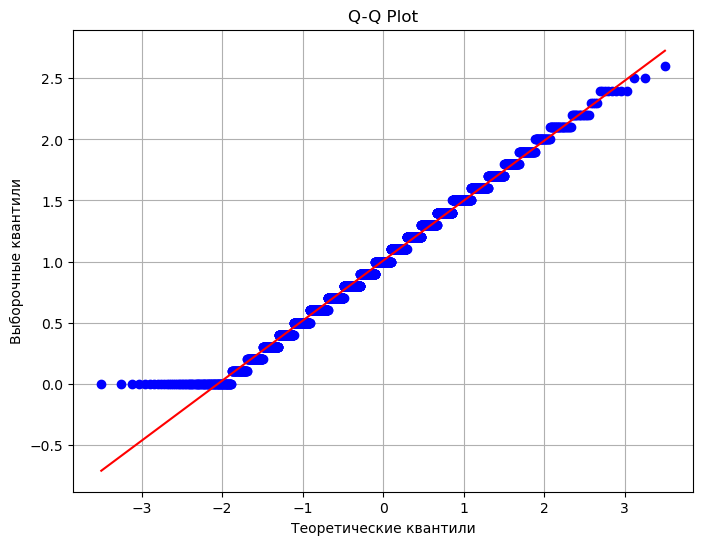

In [20]:
#Задание 2

# Определение интервалов
num_bins = 10
observed_freq, bins = np.histogram(screen_time, bins=num_bins)

# Определение ожидаемых частот для нормального распределения
mean = np.mean(screen_time)
std = np.std(screen_time)
expected_freq = np.array([len(screen_time) * (stats.norm.cdf(bins[i+1], mean, std) - stats.norm.cdf(bins[i], mean, std)) for i in range(num_bins)])

# Вычисление хи-квадрат вручную
chi_squared_stat = 0
for i in range(num_bins):
    if expected_freq[i] > 0:  # Избегаем деления на ноль
        chi_squared_stat += (observed_freq[i] - expected_freq[i]) ** 2 / expected_freq[i]

# Определение степени свободы
degrees_of_freedom = num_bins - 1 - 2

# П-значение
p_value = 1 - stats.chi2.cdf(chi_squared_stat, degrees_of_freedom)

print(f'Критерий Хи-квадрат: {chi_squared_stat}, p-значение: {p_value}')


# Вычисление асимметрии и эксцесса
skewness = (np.mean((screen_time - mean) ** 3)) / (np.std(screen_time) ** 3)
kurtosis = (np.mean((screen_time - mean) ** 4)) / (np.std(screen_time) ** 4) - 3

print(f'Асимметрия: {skewness}')
print(f'Эксцесс: {kurtosis}')


# Построение Q-Q графика
plt.figure(figsize=(8, 6))
stats.probplot(screen_time, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.grid()
plt.show()

Данные не следуют нормальному распределению. Это подтверждается как визуально (отклонение в хвостах), так и количественно (p-значение критерия Хи-квадрат = 0.0).

In [23]:
#Задание 3

# Вычисление IQR
Q1 = screen_time.quantile(0.25)
Q3 = screen_time.quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаление выбросов
filtered_data = screen_time[(screen_time >= lower_bound) & (screen_time <= upper_bound)]

# Примерный вывод
print(f'Исходное количество данных: {len(screen_time)}')
print(f'Количество данных после удаления выбросов: {len(filtered_data)}')

# Стандартизация
standardized_data = (filtered_data - np.mean(filtered_data)) / np.std(filtered_data)

# Проверка
print(f'Среднее после стандартизации: {np.mean(standardized_data)}')
print(f'Стандартное отклонение после стандартизации: {np.std(standardized_data)}')

# Логарифмирование
log_transformed_data = np.log(filtered_data + 1)  # Добавляем 1, чтобы избежать логарифмирования нуля

# Проверка
print(f'Среднее после логарифмирования: {np.mean(log_transformed_data)}')
print(f'Стандартное отклонение после логарифмирования: {np.std(log_transformed_data)}')

Исходное количество данных: 3000
Количество данных после удаления выбросов: 2997
Среднее после стандартизации: 6.519828239373625e-17
Стандартное отклонение после стандартизации: 0.9999999999999961
Среднее после логарифмирования: 0.6636301344066655
Стандартное отклонение после логарифмирования: 0.25957982385708706


Среднее: 0.6636301344066655
Дисперсия: 0.0674041755027263
Мода: 0.6931471805599453
Медиана: 0.6931471805599453
Квантили: 0.25: 0.5306282510621704, 0.50: 0.6931471805599453, 0.75: 0.8754687373538999
Эксцесс: -0.04275393614601741
Ассиметрия: -0.5421380196524846
Интерквартильный размах: 0.3448404862917295


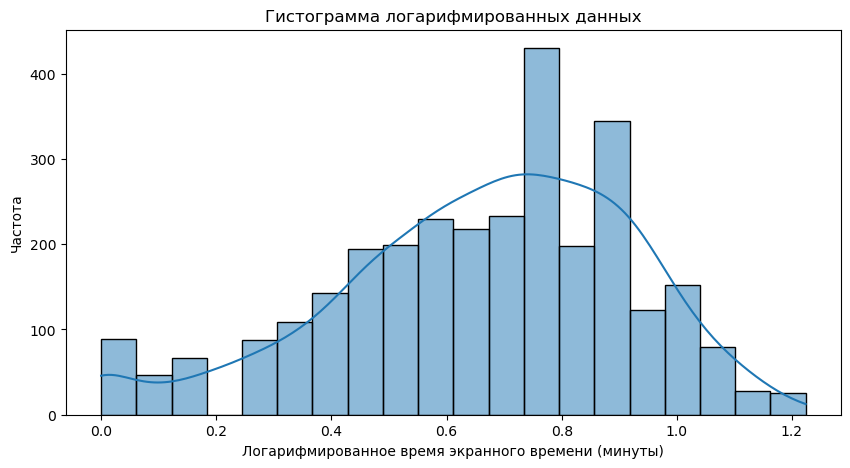

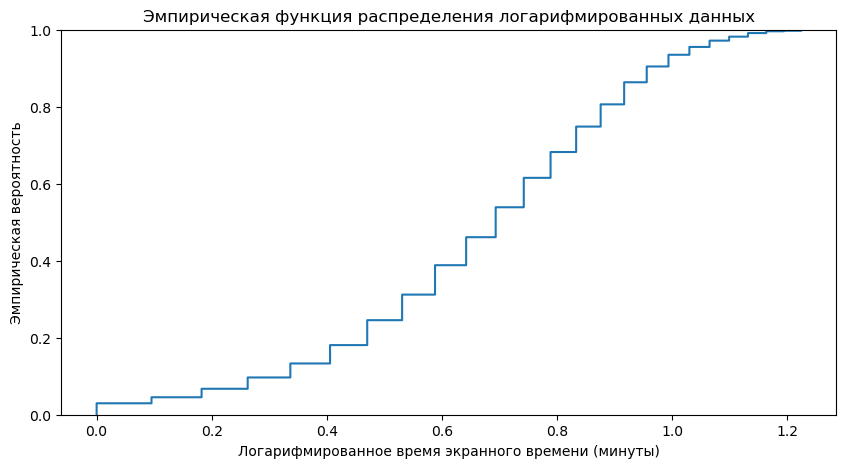

In [25]:
# Задания 1 и 2 для обработанных данных

# Рассчитаем характеристики для логарифмированных данных
mean_value = np.mean(log_transformed_data)
variance_value = np.var(log_transformed_data, ddof=1)
mode_value = stats.mode(log_transformed_data)[0]
median_value = np.median(log_transformed_data)
quantiles = np.percentile(log_transformed_data, [25, 50, 75])
kurtosis_value = stats.kurtosis(log_transformed_data, fisher=True)
skewness_value = stats.skew(log_transformed_data)
iqr = quantiles[2] - quantiles[0]

# Вывод характеристик
print(f'Среднее: {mean_value}')
print(f'Дисперсия: {variance_value}')
print(f'Мода: {mode_value}')
print(f'Медиана: {median_value}')
print(f'Квантили: 0.25: {quantiles[0]}, 0.50: {quantiles[1]}, 0.75: {quantiles[2]}')
print(f'Эксцесс: {kurtosis_value}')
print(f'Ассиметрия: {skewness_value}')
print(f'Интерквартильный размах: {iqr}')


plt.figure(figsize=(10, 5))
sns.histplot(log_transformed_data, bins=20, kde=True)
plt.title('Гистограмма логарифмированных данных')
plt.xlabel('Логарифмированное время экранного времени (минуты)')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 5))
sns.ecdfplot(log_transformed_data)
plt.title('Эмпирическая функция распределения логарифмированных данных')
plt.xlabel('Логарифмированное время экранного времени (минуты)')
plt.ylabel('Эмпирическая вероятность')
plt.show()



Анализ результатов

В среднем логарифмированное экранное время составляет примерно 0.664.

Низкая дисперсия указывает на то, что данные относительно сгруппированы вокруг среднего значения, с небольшим разбросом.

Значения моды и медианы совпадают и близки к 0.693, что указывает на симметричность в центральной части данных.

Интерквартильный размах (IQR = Q3 - Q1 = 0.875 - 0.531 = 0.345) показывает, что 50% данных находятся в диапазоне от 0.531 до 0.875.

Эксцесс близкок к 0, указывая на то, что распределение не имеет значительных отклонений от нормального.

Отрицательная асимметрия указывает на то, что распределение смещено влево, с более длинным левым хвостом.

Из критерия Хи-квадрат поскольку p-значение значительно меньше 0.05, это указывает на то, что мы отвергаем гипотезу о нормальности данных. Это значит, что данные не следуют нормальному распределению.

На Q-Q графике видно, что точки не полностью лежат на диагональной линии, особенно в хвостах. Это подтверждает вывод о ненормальности данных, так как точки в хвостах отклоняются от теоретических квантилей нормального распределения.

Заключение

Данные не являются нормально распределенными: Это подтверждается как критерием Хи-квадрат, так и визуальным анализом Q-Q графика.
Хотя эксцесс близок к 0, отрицательная асимметрия указывает на необходимость дальнейшей обработки данных для достижения большей симметрии.


Критерий Хи-квадрат: 385.90906432023917, p-значение: 0.0
Асимметрия: -0.5421380196524846
Эксцесс: -0.04275393614601741


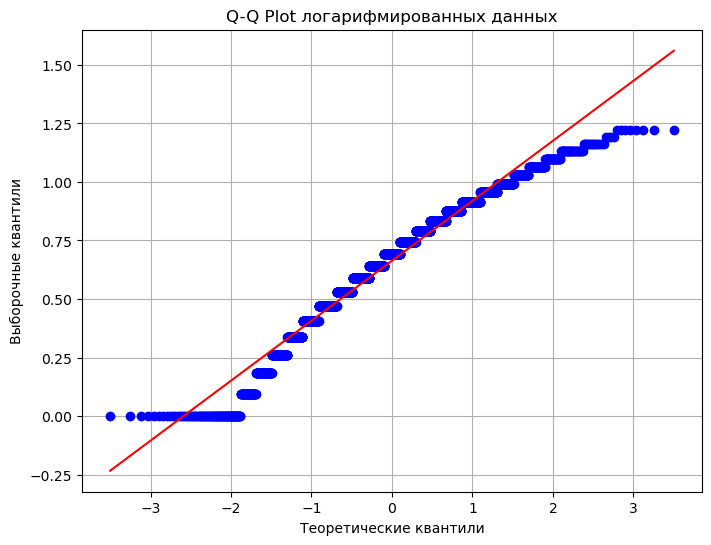

In [28]:
# Определение интервалов
num_bins = 10
observed_freq, bins = np.histogram(log_transformed_data, bins=num_bins)

# Определение ожидаемых частот для нормального распределения
mean = np.mean(log_transformed_data)
std = np.std(log_transformed_data)
expected_freq = np.array([len(log_transformed_data) * (stats.norm.cdf(bins[i+1], mean, std) - stats.norm.cdf(bins[i], mean, std)) for i in range(num_bins)])

# Вычисление хи-квадрат вручную
chi_squared_stat = 0
for i in range(num_bins):
    if expected_freq[i] > 0:  # Избегаем деления на ноль
        chi_squared_stat += (observed_freq[i] - expected_freq[i]) ** 2 / expected_freq[i]

# Определение степени свободы
degrees_of_freedom = num_bins - 1 - 2  # минус 1 для наблюдаемых и 2 для оцененных параметров

# П-значение
p_value = 1 - stats.chi2.cdf(chi_squared_stat, degrees_of_freedom)

print(f'Критерий Хи-квадрат: {chi_squared_stat}, p-значение: {p_value}')

print(f'Асимметрия: {skewness_value}')
print(f'Эксцесс: {kurtosis_value}')

plt.figure(figsize=(8, 6))
stats.probplot(log_transformed_data, dist="norm", plot=plt)
plt.title('Q-Q Plot логарифмированных данных')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.grid()
plt.show()

Средние значения:
School_Grade
10th    1.020945
11th    1.022547
12th    0.982420
7th     1.006640
8th     1.005187
9th     1.005133
Name: Screen_Time_Before_Bed, dtype: float64

Дисперсии:
School_Grade
10th    0.240960
11th    0.233507
12th    0.243762
7th     0.254694
8th     0.241366
9th     0.244107
Name: Screen_Time_Before_Bed, dtype: float64


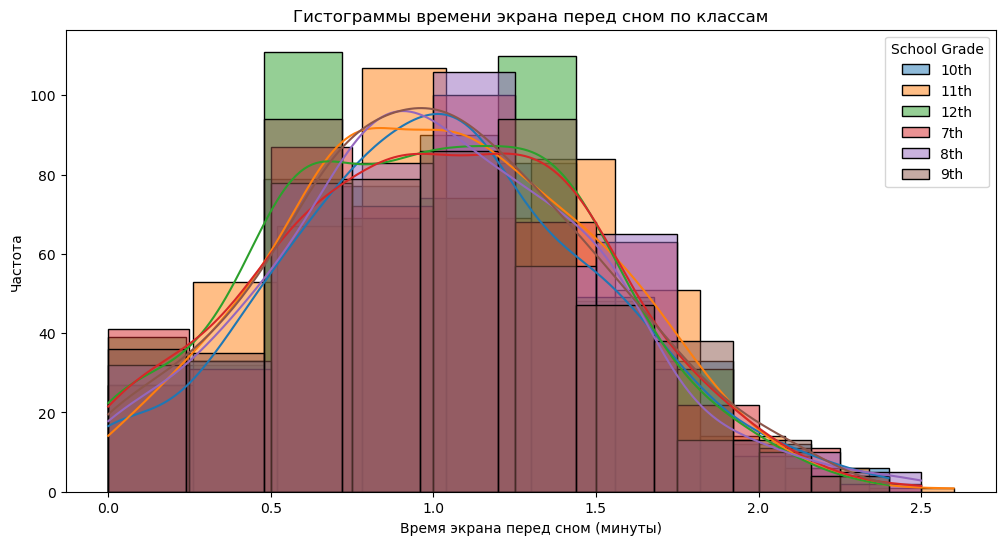

In [16]:
#Задание 4

grouped_data = data.groupby('School_Grade')['Screen_Time_Before_Bed']

# Рассчет средних и дисперсий внутри каждой группы
mean_values = grouped_data.mean()
variance_values = grouped_data.var()

# Вывод средних и дисперсий
print("Средние значения:")
print(mean_values)
print("\nДисперсии:")
print(variance_values)

# Построение гистограмм для каждой группы
plt.figure(figsize=(12, 6))
for grade, group in grouped_data:
    sns.histplot(group, bins=10, kde=True, label=str(grade), alpha=0.5)

plt.title('Гистограммы времени экрана перед сном по классам')
plt.xlabel('Время экрана перед сном (минуты)')
plt.ylabel('Частота')
plt.legend(title='School Grade')
plt.show()

Средние значения:

10 и 11 классы имеют самые высокие средние значения времени экрана перед сном (около 1.021), что может указывать на более высокую зависимость от экранного времени в этих классах.
12 класс имеет несколько более низкое среднее значение (0.982), что может говорить о том, что старшие ученики меньше проводят времени перед экраном, возможно, из-за подготовки к экзаменам или более высокой загруженности.
7, 8 и 9 классы имеют средние значения около 1.005, что говорит о схожем уровне времени экрана перед сном среди младших классов.

Дисперсии:

Дисперсии между группами достаточно близки и варьируются от 0.233 до 0.254. Это указывает на то, что разброс данных внутри групп примерно одинаковый, и в каждой группе есть как ученики с низким, так и с высоким временем экрана перед сном.
Наибольшая дисперсия наблюдается в 7 классе (0.254), что может свидетельствовать о более значительном разнообразии в привычках использования экранного времени среди учеников этого возраста.

Гистограммы:

Гистограммы показывают, что распределения времени экрана перед сном среди классов имеют схожие формы, но с некоторыми отличиями в высоте кривых.
Распределения для 10 и 11 классов имеют более выраженные пики, что указывает на то, что большее количество учеников в этих классах имеет значения времени экрана, сосредоточенные вокруг определенного уровня.
12 класс имеет более равномерное распределение, что соответствует более низкому среднему значению.
7 класс показывает наибольшее разнообразие в данных, как видно по ширине гистограммы, что может указывать на различные привычки использования экранного времени.

Заключение

В целом, результаты показывают, что хотя средние значения времени экрана перед сном схожи среди большинства классов, различия в распределениях указывают на разнообразие привычек среди учеников. Устаршие классы, вероятно, меньше проводят времени перед экранами, в то время как среди младших классов наблюдается большее разнообразие. Это может быть полезным для разработки программ по ограничению экранного времени и улучшению привычек среди учащихся.